# Plotting Code for the WRF Single Column Model Output

In [1]:
%pylab inline
import wrf
import os
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import scm_helper 

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.) Copying the data over from our WRF run.

Once the `wrf.exe` is finished running, you should find a new file titled `wrfout_d01_1999-10-22_19:00:00`.

Because the data in the `WRF/test/em_scm_xy/` directory is not saved, you'll want to copy it over into a directory that will persist even after you logout of the JupyterHub.  Let's do that now.

In [2]:
output_file = "/home/jovyan/WRF/test/em_scm_xy/wrfout_d01_1999-10-22_19:00:00"
directory = "/home/jovyan/WRF_out/wrfout"
os.system(f"cp {output_file} {directory}")

cp: cannot stat '/home/jovyan/WRF/test/em_scm_xy/wrfout_d01_1999-10-22_19:00:00': No such file or directory


256

## 2.) Loading in the data

The output file format from the WRF is usually in the NetCDF format.  This is a format that has multi-dimensional arrays.  There is also metadata that can help you understand the dimensions, units, etc.

Here we'll load in the dataset that we have obtained from our run of `./wrf.exe`.  This code will also determine what PBL scheme you used in your run.

In [3]:
d = Dataset('/home/jovyan/WRF_out/wrfout')
bl = scm_helper.get_pbl_name(d)
scheme = bl[1]

print("Your Boundary Layer Scheme:", bl)

Your Boundary Layer Scheme: ('YSU Scheme', 'YSU')


## 3.) Loading in surface layer variables from your single column model (SCM).

We'll now have to load in individual variables from our SCM run.  Let's load in a few different variables:

* U star
* Surface Latent Heat Flux
* Surface Sensible Heat Flux

In [4]:
# Similarity Theory Variables For Scailing
ustar = wrf.getvar(d, 'UST', timeidx=wrf.ALL_TIMES)
wstar = wrf.getvar(d, 'WSTAR', timeidx=wrf.ALL_TIMES)
tstar = wrf.getvar(d, 'MOL', timeidx=wrf.ALL_TIMES)
znt = wrf.getvar(d, 'ZNT', timeidx=wrf.ALL_TIMES)

# Land Surface Model Energy Budget
lh_flux = wrf.getvar(d, 'LH', timeidx=wrf.ALL_TIMES)
hfx_flux = wrf.getvar(d, 'HFX', timeidx=wrf.ALL_TIMES)
grd_flux = wrf.getvar(d, "GRDFLX", timeidx=wrf.ALL_TIMES)
sw_down = wrf.getvar(d, "SWDOWN", timeidx=wrf.ALL_TIMES)
lw_down = wrf.getvar(d, 'GLW', timeidx=wrf.ALL_TIMES)

# Stability Variables
ri = wrf.getvar(d, "BR", timeidx=wrf.ALL_TIMES)
zol = wrf.getvar(d, "ZOL", timeidx=wrf.ALL_TIMES)
fm = wrf.getvar(d, "FM", timeidx=wrf.ALL_TIMES)
fh = wrf.getvar(d, "FH", timeidx=wrf.ALL_TIMES)
rmol = 1./wrf.getvar(d, 'RMOL', timeidx=wrf.ALL_TIMES)

## 4.) Plotting Similarity Theory Variables

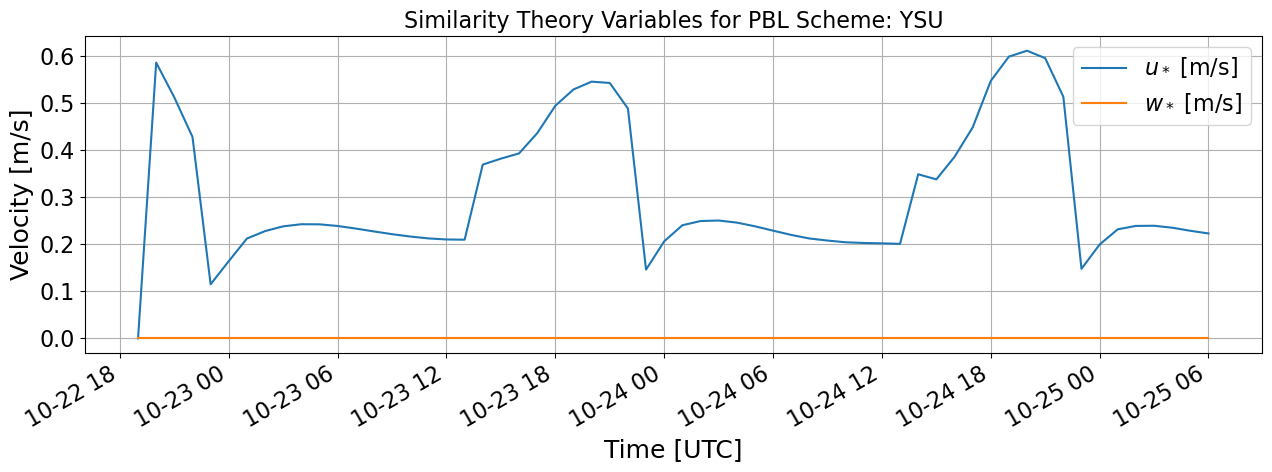

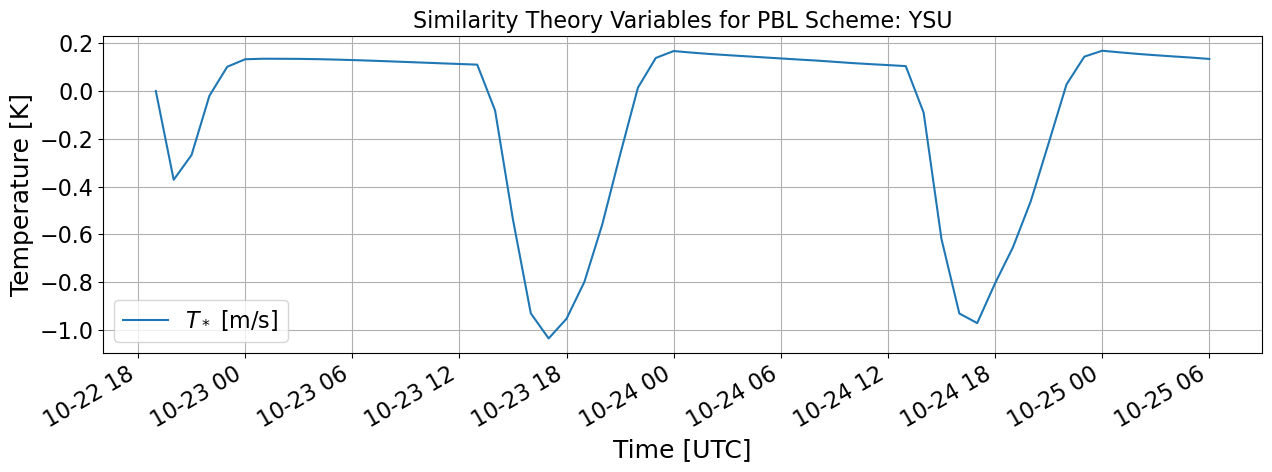

In [5]:
fig = figure(figsize=(13,5), facecolor='w')
title(f"Similarity Theory Variables for PBL Scheme: {scheme.upper()}")
plot(ustar.Time, ustar[:,0,0], label=r"$u_*$ [m/s]")
plot(ustar.Time, wstar[:,0,0], label=r"$w_*$ [m/s]")
ylabel(r"Velocity [m/s]")
xlabel("Time [UTC]")
legend(loc=0)
grid()
fig.autofmt_xdate()
plt.tight_layout()
show()

fig = figure(figsize=(13,5), facecolor='w')
title(f"Similarity Theory Variables for PBL Scheme: {scheme.upper()}")
plot(ustar.Time, tstar[:,0,0], label=r"$T_*$ [m/s]")
ylabel(r"Temperature [K]")
xlabel("Time [UTC]")
legend(loc=0)
grid()
fig.autofmt_xdate()
plt.tight_layout()
show()

## 5.) Land Surface Model (LSM) Energy Budget

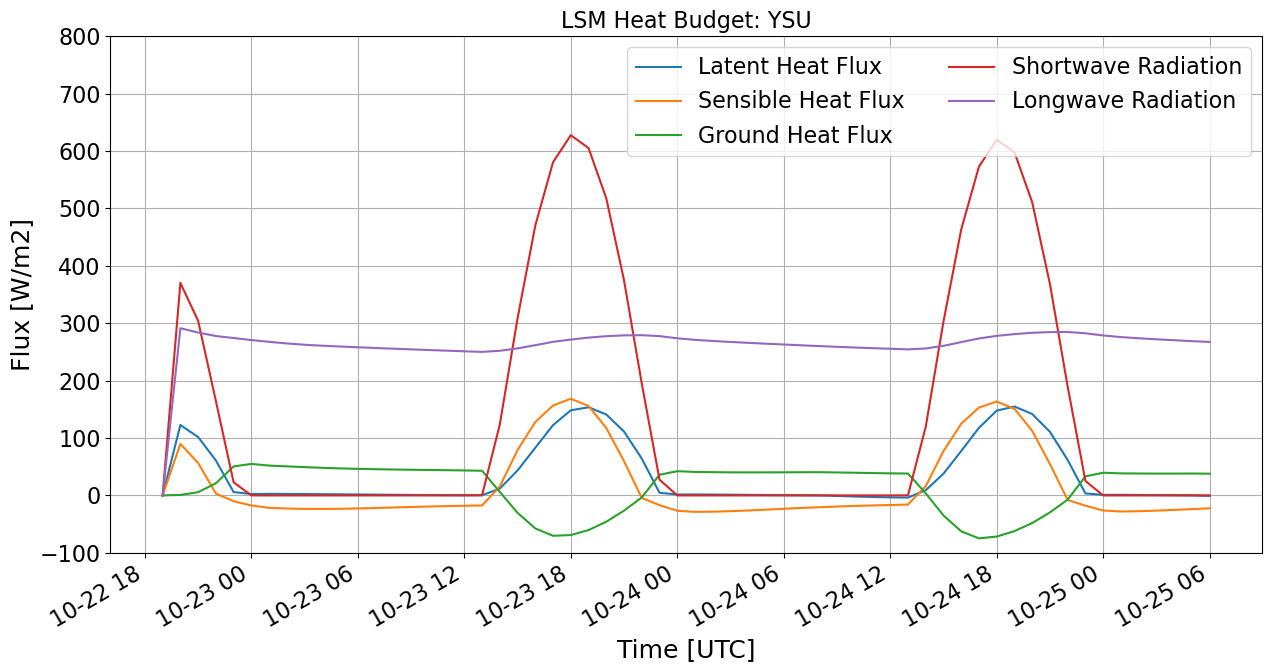

In [24]:
fig = figure(figsize=(13,7), facecolor='w')
title(f"LSM Heat Budget: {scheme.upper()}")
plot(ustar.Time, lh_flux[:,0,0], label="Latent Heat Flux")
plot(ustar.Time, hfx_flux[:,0,0], label="Sensible Heat Flux")
plot(ustar.Time, grd_flux[:,0,0], label="Ground Heat Flux")
plot(ustar.Time, sw_down[:,0,0], label="Shortwave Radiation")
plot(ustar.Time, lw_down[:,0,0], label="Longwave Radiation")
legend(loc=0, ncol=2)
ylabel("Flux [W/m2]")
xlabel("Time [UTC]")
ylim(-100,800)
grid()
fig.autofmt_xdate()
plt.tight_layout()
show()

## 6.) Stability Variables

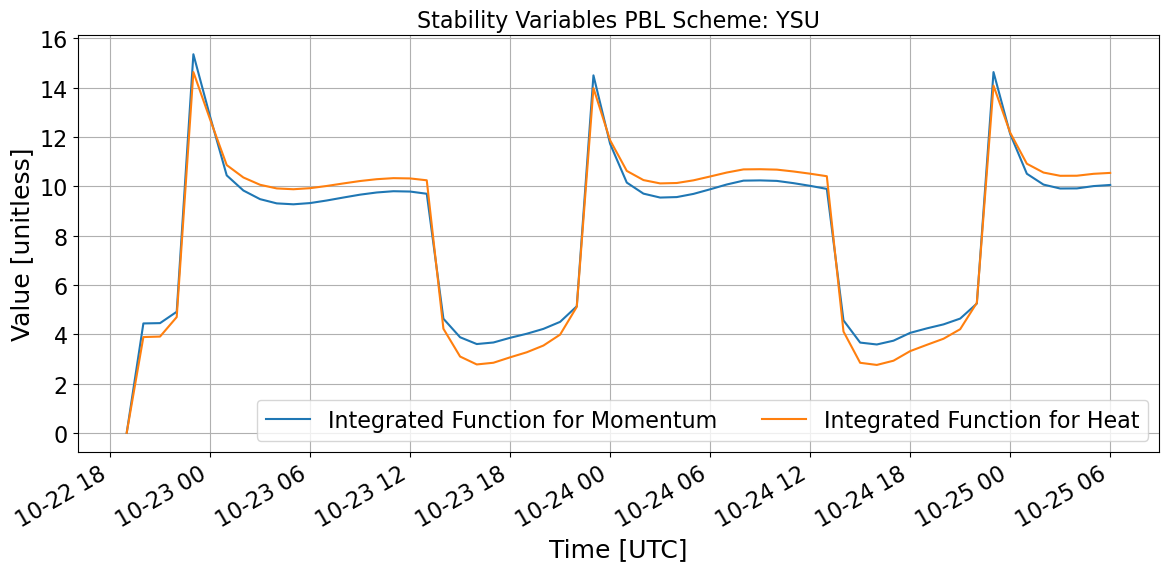

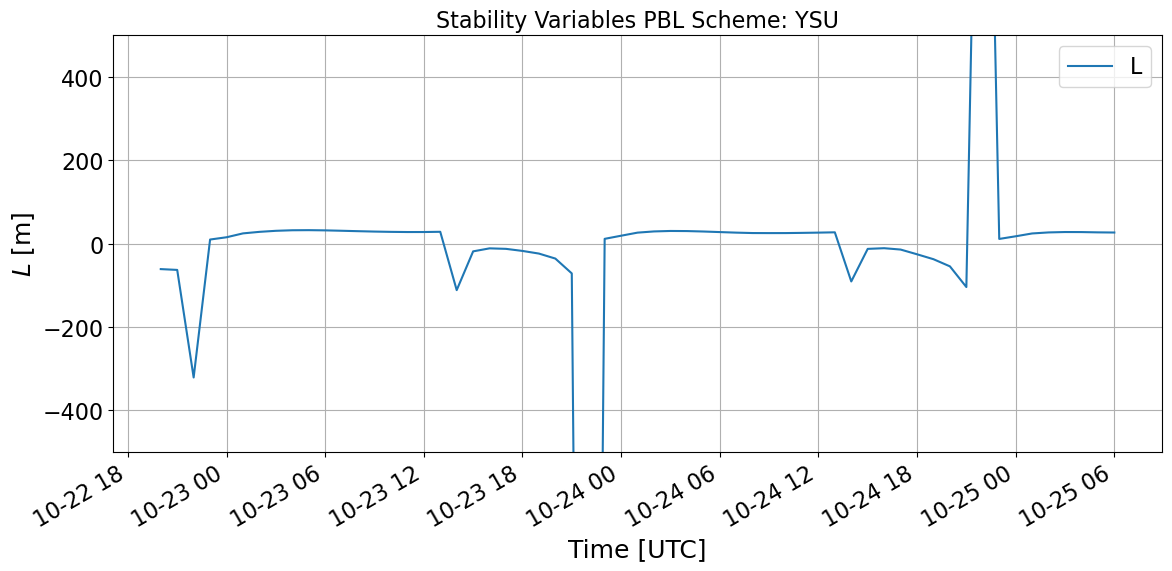

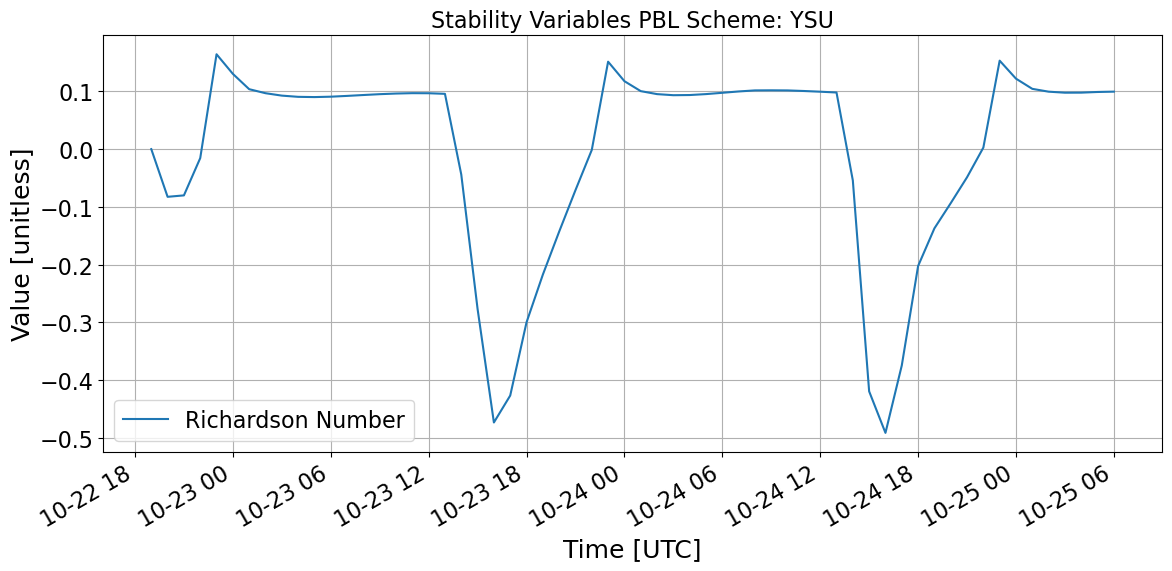

In [6]:
fig = figure(figsize=(12,6), facecolor='w')
title(f"Stability Variables PBL Scheme: {scheme.upper()}")
plot(ustar.Time, fm[:,0,0], label="Integrated Function for Momentum")
plot(ustar.Time, fh[:,0,0], label="Integrated Function for Heat")
legend(loc=0, ncol=2)
ylabel("Value [unitless]")
xlabel("Time [UTC]")
grid()
fig.autofmt_xdate()
plt.tight_layout()
show()

fig = figure(figsize=(12,6), facecolor='w')
title(f"Stability Variables PBL Scheme: {scheme.upper()}")
plot(ustar.Time, rmol[:,0,0], label="L")
legend(loc=0, ncol=2)
ylabel("$L$ [m]")
xlabel("Time [UTC]")
ylim(-500,500)
grid()
fig.autofmt_xdate()
plt.tight_layout()
show()

fig = figure(figsize=(12,6), facecolor='w')
title(f"Stability Variables PBL Scheme: {scheme.upper()}")
plot(ustar.Time, ri[:,0,0], label="Richardson Number")
legend(loc=0, ncol=2)
ylabel("Value [unitless]")
xlabel("Time [UTC]")
grid()
fig.autofmt_xdate()
plt.tight_layout()
show()